In [262]:
#import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

#loading the FED files:
fed_files = ['MORTGAGE30US.csv','CPIAUCSL.csv','RRVRUSQ156N.csv']
fed_dfs = [pd.read_csv(f, parse_dates=True, index_col=0) for f in fed_files]


print(fed_dfs[0])
print(fed_dfs[1])

            MORTGAGE30US
DATE                    
1971-04-02          7.33
1971-04-09          7.31
1971-04-16          7.31
1971-04-23          7.31
1971-04-30          7.29
...                  ...
2022-08-18          5.13
2022-08-25          5.55
2022-09-01          5.66
2022-09-08          5.89
2022-09-15          6.02

[2686 rows x 1 columns]
            CPIAUCSL
DATE                
1947-01-01    21.480
1947-02-01    21.620
1947-03-01    22.000
1947-04-01    22.000
1947-05-01    21.950
...              ...
2022-04-01   288.663
2022-05-01   291.474
2022-06-01   295.328
2022-07-01   295.271
2022-08-01   295.620

[908 rows x 1 columns]


In [263]:
#combining the fed files into a single df
fed_data = pd.concat(fed_dfs, axis=1)
fed_data 

,MORTGAGE30US,CPIAUCSL,RRVRUSQ156N
DATE,,,
1947-01-01,NaN,21.48,NaN
1947-02-01,NaN,21.62,NaN
1947-03-01,NaN,22.00,NaN
1947-04-01,NaN,22.00,NaN
1947-05-01,NaN,21.95,NaN
...,...,...,...
2022-08-18,5.13,NaN,NaN
2022-08-25,5.55,NaN,NaN
2022-09-01,5.66,NaN,NaN


In [264]:
#forward filling values -as the indices are on different time scales- & dropping n/as
fed_data = fed_data.ffill().dropna()
fed_data

,MORTGAGE30US,CPIAUCSL,RRVRUSQ156N
DATE,,,
1971-04-02,7.33,40.10,5.3
1971-04-09,7.31,40.10,5.3
1971-04-16,7.31,40.10,5.3
1971-04-23,7.31,40.10,5.3
1971-04-30,7.29,40.10,5.3
...,...,...,...
2022-08-18,5.13,295.62,5.6
2022-08-25,5.55,295.62,5.6
2022-09-01,5.66,295.62,5.6


In [265]:
#loading the Zillow files
zillow_files = ['Metro_median_sale_price_uc_sfrcondo_sm_sa_week.csv','Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv']
zillow_dfs = [pd.read_csv(f, parse_dates=True, index_col=0) for f in zillow_files]

In [266]:
#visualizing Zillow median sale price data
zillow_dfs[0]

,SizeRank,RegionName,RegionType,StateName,2010-07-31,2010-08-07,2010-08-14,2010-08-21,2010-08-28,2010-09-04,...,2022-06-04,2022-06-11,2022-06-18,2022-06-25,2022-07-02,2022-07-09,2022-07-16,2022-07-23,2022-07-30,2022-08-06
RegionID,,,,,,,,,,,,,,,,,,,,,
102001,0,United States,country,NaN,181680.0,181096.0,180111.0,179562.0,178979.0,179272.0,...,365493.0,365776.0,367523.0,367541.0,366880.0,365995.0,363379.0,359834.0,356613.0,353974.0
394913,1,"New York, NY",msa,NY,386595.0,391419.0,398578.0,399774.0,400045.0,401903.0,...,553198.0,558048.0,566479.0,570055.0,574198.0,578535.0,584735.0,591162.0,592835.0,594991.0
753899,2,"Los Angeles, CA",msa,CA,400318.0,395480.0,392122.0,393724.0,393539.0,394707.0,...,926639.0,925880.0,929637.0,917848.0,909625.0,905870.0,902202.0,895883.0,889403.0,882605.0
394463,3,"Chicago, IL",msa,IL,216350.0,219100.0,224157.0,227210.0,229046.0,222911.0,...,312547.0,315542.0,320315.0,322337.0,322907.0,320797.0,318503.0,315480.0,312839.0,314296.0
394514,4,"Dallas, TX",msa,TX,151239.0,154164.0,154518.0,156646.0,154575.0,154637.0,...,428847.0,427620.0,427860.0,427164.0,420957.0,420445.0,418063.0,413904.0,412006.0,408208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753869,253,"Bloomington, IL",msa,IL,NaN,NaN,NaN,NaN,NaN,NaN,...,213627.0,222725.0,213576.0,216279.0,212063.0,208072.0,218871.0,214279.0,219254.0,221850.0
394553,255,"East Stroudsburg, PA",msa,PA,NaN,NaN,NaN,NaN,NaN,NaN,...,262937.0,271047.0,268534.0,268128.0,280143.0,278038.0,279885.0,286287.0,287129.0,283626.0
394685,277,"Homosassa Springs, FL",msa,FL,NaN,NaN,NaN,NaN,NaN,NaN,...,255153.0,260070.0,273309.0,281195.0,281834.0,277898.0,271051.0,269131.0,269492.0,276172.0


In [267]:
#visualizing Zillow valuation data
zillow_dfs[1]

,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,...,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31
RegionID,,,,,,,,,,,,,,,,,,,,,
102001,0,United States,country,NaN,127881.0,128227.0,128591.0,129332.0,130079.0,130824.0,...,318303.0,322658.0,327381.0,332588.0,337848.0,343392.0,348415.0,352585.0,354986.0,356026.0
394913,1,"New York, NY",msa,NY,224676.0,226018.0,227226.0,229604.0,231817.0,234174.0,...,573600.0,576842.0,580804.0,585445.0,591876.0,599008.0,606525.0,612535.0,616856.0,619142.0
753899,2,"Los Angeles, CA",msa,CA,227786.0,228579.0,229794.0,232104.0,234580.0,236919.0,...,845860.0,855023.0,865646.0,877802.0,895038.0,914016.0,930381.0,931707.0,928599.0,914636.0
394463,3,"Chicago, IL",msa,IL,170004.0,170405.0,170924.0,171963.0,173064.0,174155.0,...,288807.0,291527.0,294162.0,296729.0,300023.0,303490.0,307454.0,310438.0,312286.0,312609.0
394514,4,"Dallas, TX",msa,TX,129921.0,130025.0,130112.0,130323.0,130544.0,130729.0,...,337274.0,343129.0,350514.0,358982.0,367040.0,376487.0,385149.0,392668.0,394861.0,393920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753929,923,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,NaN,...,107811.0,110066.0,112647.0,115339.0,115955.0,116220.0,116214.0,117199.0,118364.0,119798.0
394743,924,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,NaN,...,341382.0,346968.0,352628.0,357313.0,357544.0,358017.0,359810.0,363289.0,366462.0,369645.0
753874,925,"Craig, CO",msa,CO,94670.0,95014.0,95596.0,96288.0,97002.0,97541.0,...,244237.0,247636.0,250594.0,252962.0,253211.0,253361.0,254294.0,258151.0,262571.0,267315.0


In [268]:
#Keeping only national data from valuation df
#changing format & cleaning data to merge on month periods
zillow_dfs = [pd.DataFrame(df.iloc[0,5:]) for df in zillow_dfs]
for df in zillow_dfs:
    df.index = pd.to_datetime(df.index)
    df["month"] = df.index.to_period("M")

In [269]:
zillow_dfs[1]

,102001,month
2000-02-29,128227.0,2000-02
2000-03-31,128591.0,2000-03
2000-04-30,129332.0,2000-04
2000-05-31,130079.0,2000-05
2000-06-30,130824.0,2000-06
...,...,...
2022-04-30,343392.0,2022-04
2022-05-31,348415.0,2022-05
2022-06-30,352585.0,2022-06
2022-07-31,354986.0,2022-07


In [270]:
#merging the pricing & valuation data
price_data = zillow_dfs[0].merge(zillow_dfs[1], on="month")
price_data.index = zillow_dfs[0].index
price_data

,102001_x,month,102001_y
2010-08-07,181096.0,2010-08,177134.0
2010-08-14,180111.0,2010-08,177134.0
2010-08-21,179562.0,2010-08,177134.0
2010-08-28,178979.0,2010-08,177134.0
2010-09-04,179272.0,2010-09,176009.0
...,...,...,...
2022-07-09,365995.0,2022-07,354986.0
2022-07-16,363379.0,2022-07,354986.0
2022-07-23,359834.0,2022-07,354986.0
2022-07-30,356613.0,2022-07,354986.0


In [271]:
#deleting "month" column as unecessary & renaming the other columns the median sale price & Zillow value
del price_data["month"]
price_data.columns = ["Median sale price", "Zillow valuation"]


In [272]:
price_data

,Median sale price,Zillow valuation
2010-08-07,181096.0,177134.0
2010-08-14,180111.0,177134.0
2010-08-21,179562.0,177134.0
2010-08-28,178979.0,177134.0
2010-09-04,179272.0,176009.0
...,...,...
2022-07-09,365995.0,354986.0
2022-07-16,363379.0,354986.0
2022-07-23,359834.0,354986.0
2022-07-30,356613.0,354986.0


In [273]:
#adding two days to Fed data, to have both datasets on same dates
from datetime import timedelta

fed_data.index = fed_data.index + timedelta(days=2)

In [274]:
fed_data

,MORTGAGE30US,CPIAUCSL,RRVRUSQ156N
DATE,,,
1971-04-04,7.33,40.10,5.3
1971-04-11,7.31,40.10,5.3
1971-04-18,7.31,40.10,5.3
1971-04-25,7.31,40.10,5.3
1971-05-02,7.29,40.10,5.3
...,...,...,...
2022-08-20,5.13,295.62,5.6
2022-08-27,5.55,295.62,5.6
2022-09-03,5.66,295.62,5.6


In [275]:
#merging tables into one
price_data = fed_data.merge(price_data, left_index=True, right_index=True)

In [276]:
#Visualize the data
price_data 

,MORTGAGE30US,CPIAUCSL,RRVRUSQ156N,Median sale price,Zillow valuation
2010-08-07,4.49,217.923,10.3,181096.0,177134.0
2010-08-14,4.44,217.923,10.3,180111.0,177134.0
2010-08-21,4.42,217.923,10.3,179562.0,177134.0
2010-08-28,4.36,217.923,10.3,178979.0,177134.0
2010-09-04,4.32,218.275,10.3,179272.0,176009.0
...,...,...,...,...,...
2022-07-09,5.30,295.271,5.6,365995.0,354986.0
2022-07-16,5.51,295.271,5.6,363379.0,354986.0
2022-07-23,5.54,295.271,5.6,359834.0,354986.0
2022-07-30,5.30,295.271,5.6,356613.0,354986.0


In [277]:
#renaming columns
price_data.columns = ["Interest", "CPI", "Vacancy Rate", "Median sale price", "Zillow valuation"]


In [278]:
#final data format
price_data

,Interest,CPI,Vacancy Rate,Median sale price,Zillow valuation
2010-08-07,4.49,217.923,10.3,181096.0,177134.0
2010-08-14,4.44,217.923,10.3,180111.0,177134.0
2010-08-21,4.42,217.923,10.3,179562.0,177134.0
2010-08-28,4.36,217.923,10.3,178979.0,177134.0
2010-09-04,4.32,218.275,10.3,179272.0,176009.0
...,...,...,...,...,...
2022-07-09,5.30,295.271,5.6,365995.0,354986.0
2022-07-16,5.51,295.271,5.6,363379.0,354986.0
2022-07-23,5.54,295.271,5.6,359834.0,354986.0
2022-07-30,5.30,295.271,5.6,356613.0,354986.0


In [279]:
#adding adjusted price & adjusted value variables:
price_data["adj_price"] = price_data["Median sale price"] / price_data["CPI"] * 100
price_data["adj_value"] = price_data["Zillow valuation"] / price_data["CPI"] * 100

In [280]:
price_data

,Interest,CPI,Vacancy Rate,Median sale price,Zillow valuation,adj_price,adj_value
2010-08-07,4.49,217.923,10.3,181096.0,177134.0,83100.91179,81282.838434
2010-08-14,4.44,217.923,10.3,180111.0,177134.0,82648.917278,81282.838434
2010-08-21,4.42,217.923,10.3,179562.0,177134.0,82396.993433,81282.838434
2010-08-28,4.36,217.923,10.3,178979.0,177134.0,82129.467748,81282.838434
2010-09-04,4.32,218.275,10.3,179272.0,176009.0,82131.256443,80636.353224
...,...,...,...,...,...,...,...
2022-07-09,5.30,295.271,5.6,365995.0,354986.0,123952.233711,120223.794413
2022-07-16,5.51,295.271,5.6,363379.0,354986.0,123066.267937,120223.794413
2022-07-23,5.54,295.271,5.6,359834.0,354986.0,121865.675938,120223.794413
2022-07-30,5.30,295.271,5.6,356613.0,354986.0,120774.813646,120223.794413


<AxesSubplot: >

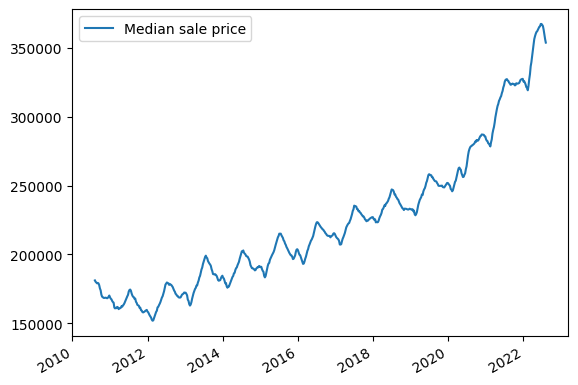

In [281]:
#plotting median sale price data over time
price_data.plot.line(y="Median sale price", use_index=True)

<AxesSubplot: >

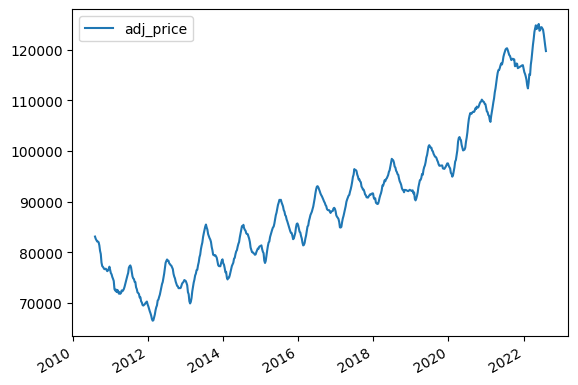

In [282]:
#plotting the adjusted price data (inflation free):
price_data.plot.line(y="adj_price", use_index=True)

In [283]:
#Adding next quarter prices with prices pulled from adj_price's next quarter
price_data["next_quarter"] = price_data["adj_price"].shift(-13)

In [284]:
#dropping nulls 
price_data.dropna(inplace=True)


In [285]:
price_data

,Interest,CPI,Vacancy Rate,Median sale price,Zillow valuation,adj_price,adj_value,next_quarter
2010-08-07,4.49,217.923,10.3,181096.0,177134.0,83100.91179,81282.838434,76663.782504
2010-08-14,4.44,217.923,10.3,180111.0,177134.0,82648.917278,81282.838434,76695.2047
2010-08-21,4.42,217.923,10.3,179562.0,177134.0,82396.993433,81282.838434,76748.485814
2010-08-28,4.36,217.923,10.3,178979.0,177134.0,82129.467748,81282.838434,76258.663232
2010-09-04,4.32,218.275,10.3,179272.0,176009.0,82131.256443,80636.353224,76411.063536
...,...,...,...,...,...,...,...,...
2022-04-09,4.72,288.663,5.6,352504.0,343392.0,122116.100782,118959.4787,123952.233711
2022-04-16,5.00,288.663,5.6,356531.0,343392.0,123511.153144,118959.4787,123066.267937
2022-04-23,5.11,288.663,5.6,358623.0,343392.0,124235.873666,118959.4787,121865.675938
2022-04-30,5.10,288.663,5.6,360344.0,343392.0,124832.070615,118959.4787,120774.813646


In [286]:
#adding change (next quart vs adj_price) column:
price_data["change"] = (price_data["next_quarter"] > price_data["adj_price"]).astype(int)


In [287]:
price_data

,Interest,CPI,Vacancy Rate,Median sale price,Zillow valuation,adj_price,adj_value,next_quarter,change
2010-08-07,4.49,217.923,10.3,181096.0,177134.0,83100.91179,81282.838434,76663.782504,0
2010-08-14,4.44,217.923,10.3,180111.0,177134.0,82648.917278,81282.838434,76695.2047,0
2010-08-21,4.42,217.923,10.3,179562.0,177134.0,82396.993433,81282.838434,76748.485814,0
2010-08-28,4.36,217.923,10.3,178979.0,177134.0,82129.467748,81282.838434,76258.663232,0
2010-09-04,4.32,218.275,10.3,179272.0,176009.0,82131.256443,80636.353224,76411.063536,0
...,...,...,...,...,...,...,...,...,...
2022-04-09,4.72,288.663,5.6,352504.0,343392.0,122116.100782,118959.4787,123952.233711,1
2022-04-16,5.00,288.663,5.6,356531.0,343392.0,123511.153144,118959.4787,123066.267937,0
2022-04-23,5.11,288.663,5.6,358623.0,343392.0,124235.873666,118959.4787,121865.675938,0
2022-04-30,5.10,288.663,5.6,360344.0,343392.0,124832.070615,118959.4787,120774.813646,0


In [288]:
#checking counts of how many times value went up vs down
price_data["change"].value_counts()


0    302
1    296
Name: change, dtype: int64

In [289]:
#Setting up predictors & target variables
predictors = ["Interest", "Vacancy Rate", "adj_price", "adj_value"]
target = "change"

In [290]:
#importing necessary modules for ml
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [291]:
#defining the ml model
def predict(train, test, predictors, target):
    rf = RandomForestClassifier(min_samples_split=5, random_state=42)
    rf.fit(train[predictors], train[target])
    preds = rf.predict(test[predictors])
    return preds


#backtest engine
START = 156
STEP = 52

def backtest(data, predictors, target):
    all_preds = []
    for i in range(START, data.shape[0], STEP):
        train = price_data.iloc[:i]
        test = price_data.iloc[i:(i+STEP)]
        all_preds.append(predict(train, test, predictors, target))
    
    preds = np.concatenate(all_preds)
    return preds, accuracy_score(data.iloc[START:][target], preds)

In [292]:
preds, accuracy = backtest(price_data, predictors, target)


In [293]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [294]:
#checking accuracy
accuracy

0.5882352941176471

In [295]:
#model diagnosis
pred_match = (preds == price_data[target].iloc[START:])
pred_match[pred_match == True] = "green"
pred_match[pred_match == False] = "red"

C:\Users\Oussama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='index', ylabel='adj_price'>

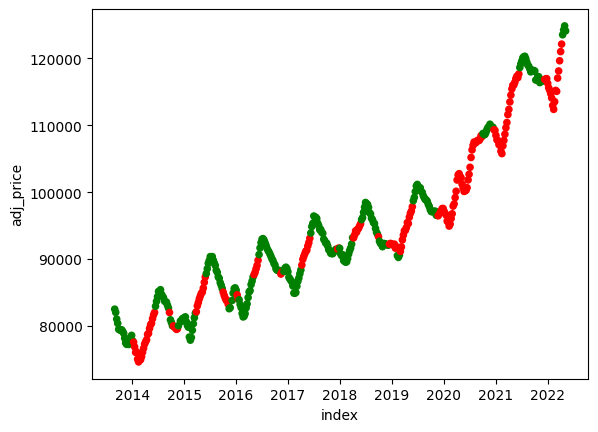

In [296]:
plot_data = price_data.iloc[START:].copy()
plot_data.reset_index().plot.scatter(x="index", y="adj_price", color=pred_match)

In [297]:
#determining most important variables in the predictions
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(min_samples_split=5, random_state=42)
rf.fit(price_data[predictors], price_data[target])

result = permutation_importance(rf, price_data[predictors], price_data[target], n_repeats=25, random_state=42)

In [298]:
result["importances_mean"]


array([0.14989967, 0.19464883, 0.28822742, 0.29230769])

In [299]:
predictors

['Interest', 'Vacancy Rate', 'adj_price', 'adj_value']

Based on our analysis the factors to predict house prices in order of importance are:
1. adj_value
2. adj_price
3. Vacancy Rate
4. Interest